# 【問題1】ジニ不純度を求める関数

まずは空間を分割するための指標値、ジニ不純度を計算する関数を作成してください。ノードtに対するジニ不純度I(t) は以下の数式で求まります。
$$ I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2} $$

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline
import sys
sys.path.append(
    '/Users/takahashiakira/Documents/DIC/diveintocode-ml/ ml-scratch/model')
sys.path.append(
    '/Users/takahashiakira/Documents/DIC/diveintocode-ml/ ml-scratch/utils')
from split import train_test_split
from decision_region import decision_region2

In [2]:
# 15個ずつのサンプルを作成
sample1 = np.array([
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0
])
sample1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
def jini_culc(c):
    """
    ジニ係数を計算する関数
    c:　クラスが含まれた、numpy配列や、リスト等
    """
    counts = np.unique(c, return_counts=True)[1].astype(np.float)
    return 1 - np.sum((counts / len(c))**2)

例

- 例１クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
- 例２クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
- 例３クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
- 例４クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [4]:
sample2 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
])
sample3 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
])
sample4 = np.zeros(30)
print(jini_culc(sample1), jini_culc(sample2), jini_culc(sample3),
      jini_culc(sample4))

0.5 0.6666666666666667 0.48 0.0


# 【問題2】情報利得を求める関数

次に、情報利得を計算する関数を作成してください。先ほど作成したジニ不純度 I(t) を計算する関数を呼び出して使います。情報利得IGは以下の数式で求まります。

$$ IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right) $$

In [5]:
# sample1を10番目で分ける場合
jini_culc(sample1) - (len(sample1[:10]) / len(sample1) * jini_culc(
    sample1[:10])) - (len(sample1[10:]) / len(sample1) *
                      jini_culc(sample1[10:]))

0.25

In [6]:
# インフォメーションゲインの関数
def IG(c, i):
    """
    c : クラスが含まれたnumpy配列やリスト等
    i : 分割する時のインデックス
    """
    parent_node = jini_culc(c)
    left_node = jini_culc(c[:i]) * len(c[:i]) / len(c)
    right_node = jini_culc(c[i:]) * len(c[i:]) / len(c)

    return parent_node - left_node - right_node

例  
左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30,   
右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143  
この他にもいくつか試してください。

In [7]:
sample5 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1
],
    dtype=np.float)
aa = IG(sample5, 40)
aa

0.14319526627218937

OK

# 【問題3】深さ1の決定木分類器クラスの作成

シンプルデータ・セット１を使う

In [8]:
# シンプルデータセット１
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples / 2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples / 2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples / 2))), np.ones(
    (int(n_samples / 2))) * (-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
y = pd.get_dummies(y, drop_first=True).values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=0)

## クラス作成！！

In [9]:
class ScratchDecesionTreeClassifier():
    """
    決定木のスクラッチ実装
    2値分類のみ対応。
    数字yの値は0,1に変換して入れてください。
    for文を使わないです。
    説明変数にカテゴリカル変数は入れないでください。

    Parameters
    ----------
    ----------
    """

    def __init__(self, max_depth=10, jini_threshold=0):
        # 様々なパラメータを初期化
        self._max_depth = max_depth  # 決定木の最大の深さ
        self._jini_threshold = jini_threshold  # ノード停止条件ジニ係数が一定の値以下となったら停止
        self._depth = None  # 現在の層の深さ
        self.feature = None  # 現在の層を分割する為の特徴量
        self.threshold = None  # 現在の層を分割する為の閾値
        self._left = None  # 左側に行った時に使うクラス。
        self._right = None  # 右側に行った時に使うクラス。
        self._rabel = None  # 葉ノードだったときの自分のラベル。

    def _jini_culc(self, c):
        """
        ジニ係数を計算する関数
        c:　クラスが含まれた、numpy配列や、リスト等
        """
        counts = np.unique(c, return_counts=True)[1]
        return 1 - np.sum((counts / len(c))**2)

    def _jini_culc2(self, cumsum, index):
        """
        2値分類限定で累積和とインデックスからジニ係数を計算する関数
        cumsum:　ndarray, shape(n_samples,n_features)
        index: ndarray, shape(n_samples,)
        """
        return 1 - ((cumsum / index)**2 + ((index - cumsum) / index)**2)

    def _kaburi(self, X):
        """
        行列の中に被っている数字等が合った場合はインデックスが低い数値を消したいので
        被っている数字があった部分のかつ、大きい数字以外を0で返す関数  
        X: ndarray, shape(n_samples, n_features)
        return
        bool型　shape(n_samples -1, n_features)
        """
        sortX = np.sort(X, axis=0)
        return (sortX[:-1, :] - sortX[1:, :]) != 0

    def _IG_all(self, X, y):
        """
        0,1で分類されたクラスのベクトルと、Xを与えると(n_samples - 1,n_feature)の数だけinfomation gainを返してすごい関数。
        累積和とインデックスを利用して、IGを算出する
        X : ndarray, shape(n_samples, n_features)
        学習用データの特徴量
        y : ndarray, shape(n_samples,1)
        学習用データの正解値
        """
        X_sort = np.argsort(X, axis=0)  # Xのソート順をインデックスで取得
        y_sort = y[X_sort]  # Xのソートされたものをyに渡す(y.shape= n_sample,n_feature)
        index = np.arange(1, len(y)).reshape(-1, 1)  # インデックスを取得(1からスタート)
        index_rev = index[::-1]  # インデックスの逆順
        # クラスが0,1と仮定して、累積和を計算する (indexと組み合わせればn番目時点での1のクラスの数が計算される)
        cumsum_y = np.cumsum(y_sort, axis=0)
        # 累積和の逆順 (leftに行かなかった１のクラスの数)
        cumsum_rev = np.sum(y, axis=0) - cumsum_y

        parents_jini = self._jini_culc(y)  # 親のジニ係数
        left_jini = self._jini_culc2(cumsum_y[:-1], index)  # 左側のジニ係数
        right_jini = self._jini_culc2(cumsum_rev[:-1], index_rev)  # 右側のジニ係数
        ig = parents_jini - (index / len(y)) * left_jini - \
            ((len(y) - index) / len(y)) * right_jini  # インフォメーションゲインの計算
        return ig, X_sort

    def fit(self, X, y, max_depth=10, jini_threshold=0, _depth=0):
        """
        決定木を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
        学習用データの正解値
        """

        # パラメータの初期化
        self._max_depth = max_depth
        self._jini_threshold = jini_threshold
        self._depth = _depth  # 現在の層の深さを設定する。

        # 現在の深さがマックスデプスか、一定のジニ係数以下となった場合、自身のラベルを設定して終了
        if (self._depth == self._max_depth) or (self._jini_culc(y) <=
                                                self._jini_threshold):
            if y.mean() > 0.5:  # yの平均が0.5以上の場合は1のクラスとなる。違う場合は0となる。
                self._rabel = np.int8(1)
            else:
                self._rabel = np.int8(0)
            return

        # 学習開始
        # (samples-1, features)のIGを取得、X_sortも取得する。
        ig_list, X_sort = self._IG_all(X, y)
        ig_list = ig_list * self._kaburi(X)  # 説明変数で同じ値があった場合はそこのIGをゼロにする。
        # ig_listの最高値のラベルをmax_indexに格納
        max_index = np.unravel_index(np.argmax(ig_list, axis=None),
                                     ig_list.shape)
        self.threshold = X[X_sort[max_index],
                           max_index[1]]  # max_indexのラベルを使って閾値を算出
        self.feature = max_index[1]  # 使用する特徴量を格納

        # それぞれノードごとに分ける
        leftX = X[X[:, self.feature] > self.threshold]  # 閾値以上のXはレフトノードへ
        lefty = y[X[:, self.feature] > self.threshold]  # 閾値以上のyはレフトノードへ
        rightX = X[X[:, self.feature] <= self.threshold]  # 閾値より小さいXはライトノードへ
        righty = y[X[:, self.feature] <= self.threshold]  # 閾値より小さいyはライトノードへ

        # 分けられたノードを再fittingする
        self._left = ScratchDecesionTreeClassifier()
        self._left.fit(leftX, lefty, self._max_depth, self._jini_threshold,
                       self._depth + 1)  # 次のfittingはdepthが増えてる。

        self._right = ScratchDecesionTreeClassifier()
        self._right.fit(rightX, righty, self._max_depth, self._jini_threshold,
                        self._depth + 1)

    def predict(self, X):
        """
        説明
        決定木を使い推定する。
        自身のクラスで分割した後に子クラスに分割された行列を再度予測させる。
        葉ノードだった場合に自身のラベルを枝に返す。
        枝ノードは帰ってきた葉ノードのラベル２セットをくっつけて、上に返す。
        最後の親は全てまとめて並び替えをしてリターンとして返す。
        帰ってきた、ラベルがどのXのラベルかわからないので、初めにインデックスを全てに付与しておく。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
        Returns
        -------
        pred:  次の形のndarray, shape (n_samples, 1)
        決定木による推定結果
        """
        # 初めのXにインデックスを追加しておく。
        if self._depth == 0:
            # Xの1列目にインデックスを追加
            X = np.hstack((np.indices((len(X), 1), np.int)[0], X))

        # 自分のラベルが1だった場合は元のインデックスに全て1を追加して返す。
        if self._rabel == 1:
            # shape(samples,2)
            return np.stack([X[:, 0], np.ones(len(X), dtype=np.int8)], axis=1)
        # 0だったらインデックスと０を返す。
        elif self._rabel == 0:
            # shape(sample, 2)
            return np.stack([X[:, 0], np.zeros(len(X), dtype=np.int8)], axis=1)

        # 自分のクラスの閾値を使って、Xを分ける。
        left_X = X[X[:, self.feature + 1] > self.threshold]
        right_X = X[X[:, self.feature + 1] <= self.threshold]

        # それぞれを予測する。
        l_pred = self._left.predict(left_X)
        r_pred = self._right.predict(right_X)
        y_pred = np.concatenate([l_pred, r_pred])  # l_predとr_predをくっつける。

        if self._depth == 0:  # 親ノードだった場合インデックスを使って元の並びに戻してyの値のみ返す。
            y_pred = y_pred[np.argsort(y_pred, axis=0)[:, 0]][:, 1]

        return y_pred

### 試しに使ってみる。

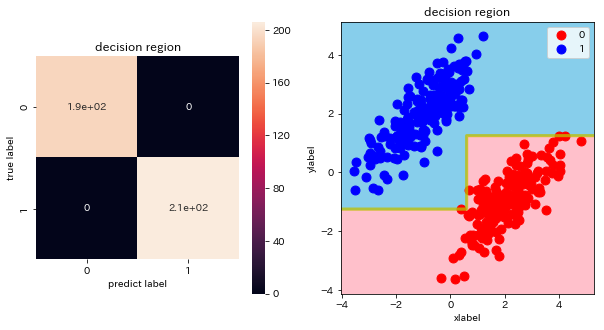

経過時間：0.6122591495513916


In [10]:
import time
# 処理前の時刻
t1 = time.time()

dtc = ScratchDecesionTreeClassifier()
dtc.fit(X_train, y_train)
decision_region2(X_train, y_train, model=dtc)
# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print('経過時間：{}'.format(elapsed_time))

### sklearnと比較してみる。

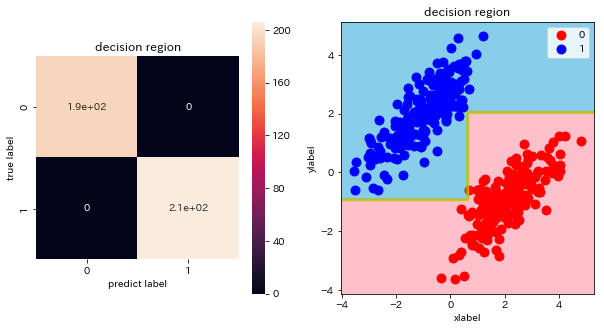

経過時間：0.3582601547241211


In [11]:
# 処理前の時刻
t1 = time.time()

sktree = DecisionTreeClassifier()
sktree.fit(X_train, y_train)
decision_region2(X_train, y_train, model=sktree)
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")

あと少しでスピードも追いつけそう。。。

## 大きいデータに対応出来るのか。

In [12]:
train = pd.read_csv('application_train.csv')
df = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2']].dropna()
X = df.drop('TARGET', axis=1).values
y = df.TARGET.values
X.shape, y.shape

((133922, 2), (133922,))

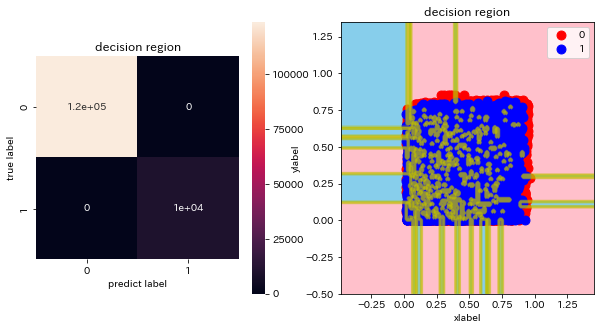

経過時間：8.59953498840332


In [13]:
t1 = time.time()

dtc = ScratchDecesionTreeClassifier()
dtc.fit(X, y, max_depth=100)
decision_region2(X, y, model=dtc)
# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")

slearnの場合

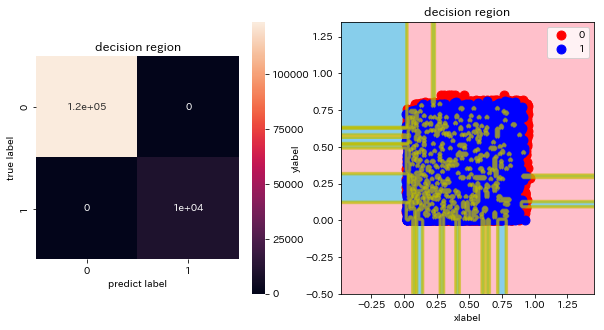

経過時間：3.6221749782562256


In [14]:
# 処理前の時刻
t1 = time.time()

sktree = DecisionTreeClassifier()
sktree.fit(X, y)
decision_region2(X, y, model=sktree)
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")

完全分離は出来たが、スピードが遅い。。。クラスの設計自体を変更すればスピードアップもあるかもしれないが、諦める。

# 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成

# 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成

# 【問題6】指標値の算出

# 【問題7】決定領域の可視化

# 【問題8】決定木の利用場面



1.   標準化しないで済むので楽。
2.   外れ値に強い。
1.   それぞれの変数の分布に依存しない。
2.   線形関係でなくても対応出来る。
1.   気づいたら過学習しがち
1.   一本で使うよりアンサンブル学習等の方が汎化性能が高い
2.   説明しやすい。




